Extracting parameters from /System/Volumes/Data/data/matlab/eeglab/sample_data/eeglab_data_epochs_ica.set...
Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
Ready.
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)



/var/folders/3j/r_x6gj790wvcx_mh157ctypm0000gn/T/ipykernel_87299/3793415626.py:6: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  raw = mne.io.read_epochs_eeglab(eeglab_data_path)
/var/folders/3j/r_x6gj790wvcx_mh157ctypm0000gn/T/ipykernel_87299/3793415626.py:6: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['EOG1', 'EOG2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_epochs_eeglab(eeglab_data_path)
/var/folders/3j/r_x6gj790wvcx_mh157ctypm0000gn/T/ipykernel_87299/3793415626.py:7: RuntimeWarning: filter_length (423) is longer than the signal (384), distortion is likely. Reduce filter length or filter a longer signal.
  raw.filter(1., 40., fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Para

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by number: 20 components


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:    0.3s finished


Fitting ICA took 0.5s.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/3j/r_x6gj790wvcx_mh157ctypm0000gn/T/ipykernel_87299/3793415626.py:17: RuntimeWarning: The provided Epochs instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  labels = label_components(raw, ica, method='iclabel')
/var/folders/3j/r_x6gj790wvcx_mh157ctypm0000gn/T/ipykernel_87299/3793415626.py:17: RuntimeWarning: The provided Epochs instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  labels = label_components(raw, ica, method='iclabel')
/var/folders/3j/r_x6gj790wvcx_mh157ctypm0000gn/T/ipykernel_87299/3793415626.py:17: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extend

Component 0: brain
Component 1: brain
Component 2: brain
Component 3: eye blink
Component 4: brain
Component 5: brain
Component 6: brain
Component 7: brain
Component 8: brain
Component 9: brain
Component 10: brain
Component 11: brain
Component 12: brain
Component 13: brain
Component 14: brain
Component 15: brain
Component 16: brain
Component 17: brain
Component 18: brain
Component 19: brain


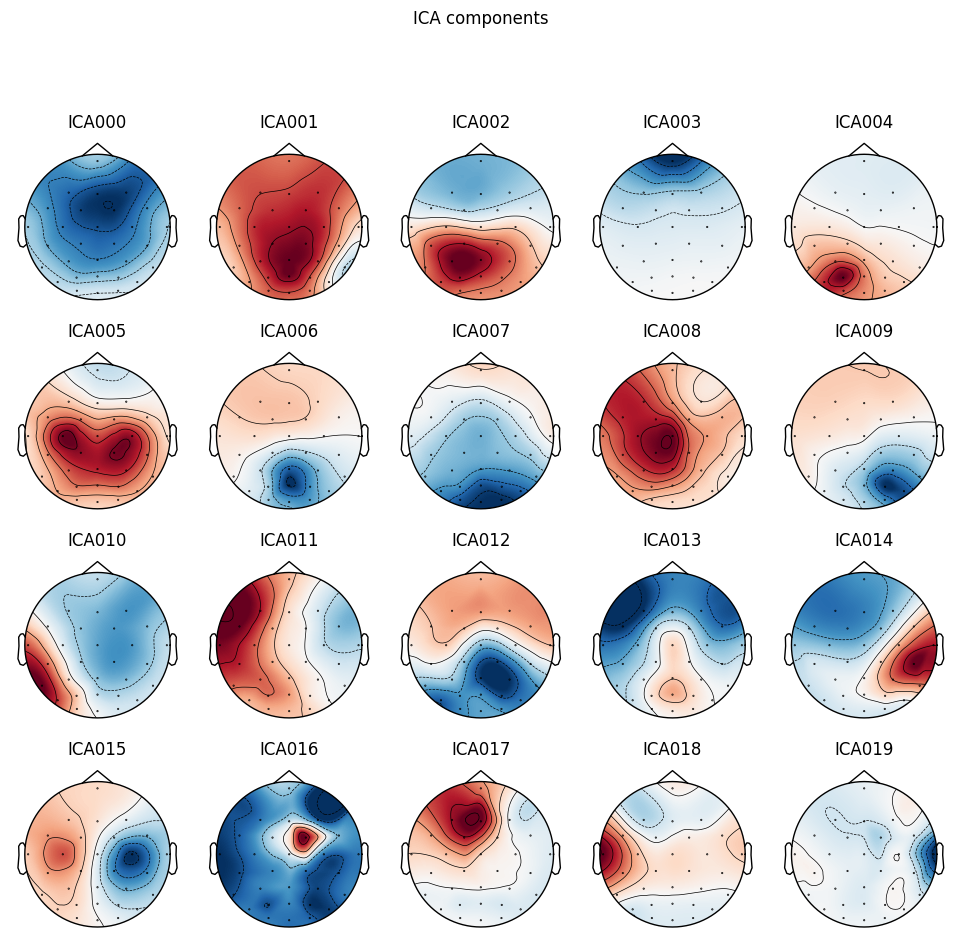

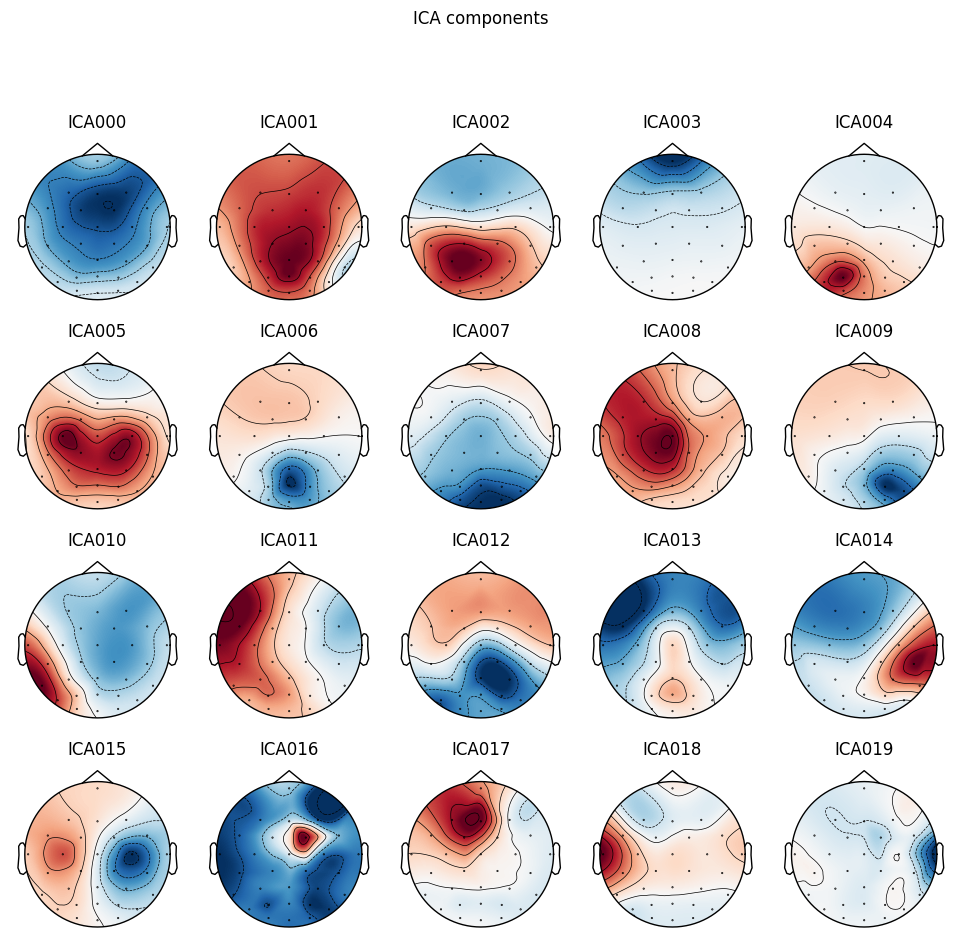

In [17]:
import mne
from mne.preprocessing import ICA
from mne_icalabel import label_components

eeglab_data_path = '/System/Volumes/Data/data/matlab/eeglab/sample_data/eeglab_data_epochs_ica.set'
raw = mne.io.read_epochs_eeglab(eeglab_data_path)
raw.filter(1., 40., fir_design='firwin')

# Select the EEG channels
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, exclude='bads')

# Fit ICA
ica = ICA(n_components=20, random_state=97)
ica.fit(raw, picks=picks)

# Label components using ICALabel
labels = label_components(raw, ica, method='iclabel')

# Print the labels
for idx, label in enumerate(labels['labels']):
    print(f"Component {idx}: {label}")

# Plot the ICs to visually inspect them
ica.plot_components()